In [1]:
import sys

sys.path.insert(0, '..')

## Setup the Rio Primero project

In [2]:
from morpheus.common.types.identity.Identity import UserId
from morpheus.project.types.Model import Model, SpatialDiscretization
from morpheus.project.types.geometry import Polygon
from morpheus.project.types.discretization.spatial import Grid, Rotation
from morpheus.project.types.Project import Project, Metadata, Name, Description, Tags

user_id = UserId.new()

project = (Project.new(user_id=user_id).with_updated_metadata(
  metadata=Metadata(
    name=Name('Rio Primero'),
    description=Description('Rio Primero Project in Argentina'),
    tags=Tags.from_list(['rio primero', 'argentina'])
  )
))

model = Model.new()
project = project.with_updated_model(model)
model = project.model

area = Polygon([[
  (-63.687336, -31.313615),
  (-63.687336, -31.367449),
  (-63.56926, -31.367449),
  (-63.56926, -31.313615),
  (-63.687336, -31.313615)
]])

spatial_discretization = SpatialDiscretization.from_geometry_with_grid(
  geometry=area,
  grid=Grid.cartesian_from_polygon(
    polygon=area,
    n_cols=75,
    n_rows=40,
    rotation=Rotation(0),
  ),
)

model = model.with_updated_spatial_discretization(spatial_discretization=spatial_discretization)
area.centroid()

[(0, 0)] [(74, 0)]
[(0, 1)] [(74, 1)]
[(0, 2)] [(74, 2)]
[(0, 3)] [(74, 3)]
[(0, 4)] [(74, 4)]
[(0, 5)] [(74, 5)]
[(0, 6)] [(74, 6)]
[(0, 7)] [(74, 7)]
[(0, 8)] [(74, 8)]
[(0, 9)] [(74, 9)]
[(0, 10)] [(74, 10)]
[(0, 11)] [(74, 11)]
[(0, 12)] [(74, 12)]
[(0, 13)] [(74, 13)]
[(0, 14)] [(74, 14)]
[(0, 15)] [(74, 15)]
[(0, 16)] [(74, 16)]
[(0, 17)] [(74, 17)]
[(0, 18)] [(74, 18)]
[(0, 19)] [(74, 19)]
[(0, 20)] [(74, 20)]
[(0, 21)] [(74, 21)]
[(0, 22)] [(74, 22)]
[(0, 23)] [(74, 23)]
[(0, 24)] [(74, 24)]
[(0, 25)] [(74, 25)]
[(0, 26)] [(74, 26)]
[(0, 27)] [(74, 27)]
[(0, 28)] [(74, 28)]
[(0, 29)] [(74, 29)]
[(0, 30)] [(74, 30)]
[(0, 31)] [(74, 31)]
[(0, 32)] [(74, 32)]
[(0, 33)] [(74, 33)]
[(0, 34)] [(74, 34)]
[(0, 35)] [(74, 35)]
[(0, 36)] [(74, 36)]
[(0, 37)] [(74, 37)]
[(0, 38)] [(74, 38)]
[(0, 39)] [(74, 39)]


Point(coordinates=(-63.628298, -31.340532), type='Point')

## Setup Time Discretization

In [3]:
from morpheus.project.types.discretization.time.TimeUnit import TimeUnit
from morpheus.project.types.discretization.time.Stressperiods import StartDateTime, StressPeriodCollection, \
  StressPeriod, NumberOfTimeSteps, TimeStepMultiplier, IsSteadyState
from morpheus.project.types.discretization.time import TimeDiscretization
from datetime import datetime

time_discretization = TimeDiscretization(
  start_date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
  end_date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
  stress_periods=StressPeriodCollection([
    StressPeriod(
      start_date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
      number_of_time_steps=NumberOfTimeSteps(1),
      time_step_multiplier=TimeStepMultiplier(1),
      steady_state=IsSteadyState.yes()
    ),
  ]),
  time_unit=TimeUnit.days()
)

model = model.with_updated_time_discretization(time_discretization=time_discretization)

In [4]:
import folium

m = folium.Map(tiles="cartodbpositron", crs="EPSG3857", zoom_start=12, location=[50.965, 13.922])
m.add_child(folium.GeoJson(model.spatial_discretization.geometry.as_geojson()))
m.add_child(folium.GeoJson(model.spatial_discretization.geometry.centroid().as_geojson()))

m.fit_bounds(m.get_bounds())
m

In [5]:
grid = spatial_discretization.grid
cell_geometries = grid.get_wgs_cell_geometries()

n_cols = grid.n_cols()
n_rows = grid.n_rows()

for col in range(n_cols):
  for row in range(n_rows):
    cell_geometry = cell_geometries[row][col]
    folium.GeoJson(cell_geometry.as_geojson()).add_to(m)

m

# Setup Layers

In [6]:
from morpheus.project.types.layers.Layer import LayerName, LayerConfinement, LayerDescription, Layer, LayerProperties

layers = model.layers
first_layer = layers[0]
first_layer.name = LayerName('Top Layer')
first_layer.type = LayerConfinement.convertible()
first_layer.description = LayerDescription('Top Layer')
first_layer.properties = LayerProperties.from_values(
  top=460,
  bottom=450,
  initial_head=460,
  hk=8.64,
  hani=1,
  vka=0.864,
  specific_storage=1e-5,
  specific_yield=0.2,
)

layer = layers.with_updated_layer(first_layer)

second_layer = Layer.from_default()
second_layer.name = LayerName('Aquitard')
second_layer.type = LayerConfinement.confined()
second_layer.description = LayerDescription('Aquitard')
second_layer.properties = LayerProperties.from_values(
  top=450,
  bottom=448,
  initial_head=450,
  hk=10,
  hani=10,
  vka=0.1,
  specific_storage=1e-5,
  specific_yield=0.2,
)

layers = layers.with_added_layer(second_layer)
third_layer = Layer.from_default()
third_layer.name = LayerName('Aquifer')
third_layer.type = LayerConfinement.confined()
third_layer.description = LayerDescription('Aquifer')

third_layer.properties = LayerProperties.from_values(
  top=448,
  bottom=390,
  initial_head=448,
  hk=8.64,
  hani=8.64,
  vka=0.864,
  specific_storage=1e-5,
  specific_yield=0.2,
)

layers = layers.with_added_layer(third_layer)
model = model.with_updated_layers(layers)

layers

LayersCollection(layers=[Layer(layer_id=LayerId(value='8def5e32-1ff7-484a-9d62-e6abd8f376a8'), name=LayerName(value='Top Layer'), description=LayerDescription(value='Top Layer'), confinement=LayerConfinement(type='confined'), properties=LayerProperties(hk=LayerPropertyValues(value=LayerPropertyDefaultValue(value=8.64), raster=None, zones=None), hani=LayerPropertyValues(value=LayerPropertyDefaultValue(value=1), raster=None, zones=None), vka=LayerPropertyValues(value=LayerPropertyDefaultValue(value=0.864), raster=None, zones=None), specific_storage=LayerPropertyValues(value=LayerPropertyDefaultValue(value=1e-05), raster=None, zones=None), specific_yield=LayerPropertyValues(value=LayerPropertyDefaultValue(value=0.2), raster=None, zones=None), initial_head=LayerPropertyValues(value=LayerPropertyDefaultValue(value=460), raster=None, zones=None), top=LayerPropertyValues(value=LayerPropertyDefaultValue(value=460), raster=None, zones=None), bottom=LayerPropertyValues(value=LayerPropertyDefault

# Setup General Head Boundaries

In [7]:
from morpheus.project.types.boundaries.Observation import ObservationId, ObservationName
from morpheus.project.types.geometry import LineString, Point
from morpheus.project.types.boundaries.Boundary import GeneralHeadBoundary, BoundaryName
from morpheus.project.types.boundaries.GeneralHeadObservation import GeneralHeadObservation, GeneralHeadRawDataItem, \
  Stage, Conductance

ghb_east = GeneralHeadBoundary.from_geometry(
  name=BoundaryName('GHB-East'),
  geometry=LineString([
    (-63.57, -31.367),
    (-63.57, -31.314),
  ]),
  grid=grid,
  affected_layers=[layers[2].layer_id],
  observations=[
    GeneralHeadObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((-63.57, -31.367)),
      data=[
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
          stage=Stage.from_float(455),
          conductance=Conductance.from_float(200),
        ),
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
          stage=Stage.from_float(455),
          conductance=Conductance.from_float(200),
        ),
      ]
    )
  ]
)

ghb_east.affected_cells = ghb_east.affected_cells.mask(other=spatial_discretization.affected_cells)

model.boundaries.add_boundary(ghb_east)

ghb_west = GeneralHeadBoundary.from_geometry(
  name=BoundaryName('GHB-West'),
  geometry=LineString([
    (-63.687, -31.367),
    (-63.687, -31.314),
  ]),
  grid=grid,
  affected_layers=[layers[2].layer_id],
  observations=[
    GeneralHeadObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((-63.687, -31.367)),
      data=[
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
          stage=Stage.from_float(460),
          conductance=Conductance.from_float(200),
        ),
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
          stage=Stage.from_float(460),
          conductance=Conductance.from_float(200),
        ),
      ]
    )
  ]
)

ghb_west.affected_cells = ghb_west.affected_cells.mask(other=spatial_discretization.affected_cells)

model.boundaries.add_boundary(ghb_west)

m = folium.Map(tiles="cartodbpositron", crs="EPSG3857", zoom_start=12, location=[50.965, 13.922])
m.add_child(folium.GeoJson(model.spatial_discretization.geometry.as_geojson()))

m.add_child(folium.GeoJson(ghb_east.as_geojson()))
m.add_child(folium.GeoJson(ghb_east.affected_cells.to_geojson(grid).as_geojson()))

m.add_child(folium.GeoJson(ghb_west.as_geojson()))
m.add_child(folium.GeoJson(ghb_west.affected_cells.to_geojson(grid).as_geojson()))

m.fit_bounds(m.get_bounds())
m

# Setup well boundaries

In [8]:
from morpheus.project.types.boundaries.Boundary import WellBoundary, BoundaryName
from morpheus.project.types.boundaries.WellObservation import WellObservationValue, PumpingRate

model.boundaries.add_boundary(WellBoundary.from_geometry(
  name=BoundaryName('Irrigation Well 1'),
  geometry=Point((-63.671125, -31.325009)),
  grid=grid,
  affected_layers=[layers[2].layer_id],
  data=[
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
  ]
))

model.boundaries.add_boundary(WellBoundary.from_geometry(
  name=BoundaryName('Irrigation Well 2'),
  geometry=Point((-63.659952, -31.330144)),
  grid=grid,
  affected_layers=[layers[2].layer_id],
  data=[
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
  ]
))

model.boundaries.add_boundary(WellBoundary.from_geometry(
  name=BoundaryName('Irrigation Well 3'),
  geometry=Point((-63.674691, -31.342506)),
  grid=grid,
  affected_layers=[layers[2].layer_id],
  data=[
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
  ]
))

model.boundaries.add_boundary(WellBoundary.from_geometry(
  name=BoundaryName('Irrigation Well 4'),
  geometry=Point((-63.637379, -31.359613)),
  grid=grid,
  affected_layers=[layers[2].layer_id],
  data=[
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
  ]
))

model.boundaries.add_boundary(WellBoundary.from_geometry(
  name=BoundaryName('Irrigation Well 5'),
  geometry=Point((-63.582069, -31.324063)),
  grid=grid,
  affected_layers=[layers[2].layer_id],
  data=[
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
      pumping_rate=PumpingRate.from_float(-5000),
    ),
  ]
))

model.boundaries.add_boundary(WellBoundary.from_geometry(
  name=BoundaryName('Public Well 1'),
  geometry=Point((-63.625402, -31.329897)),
  grid=grid,
  affected_layers=[layers[2].layer_id],
  data=[
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
      pumping_rate=PumpingRate.from_float(-8000),
    ),
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
      pumping_rate=PumpingRate.from_float(-8000),
    ),
  ]
))

model.boundaries.add_boundary(WellBoundary.from_geometry(
  name=BoundaryName('Public Well 2'),
  geometry=Point((-63.623027, -31.331184)),
  grid=grid,
  affected_layers=[layers[2].layer_id],
  data=[
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
      pumping_rate=PumpingRate.from_float(-8000),
    ),
    WellObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
      pumping_rate=PumpingRate.from_float(-8000),
    ),
  ]
))

# Setup recharge boundary

In [9]:
from morpheus.project.types.boundaries.Observation import ObservationId
from morpheus.project.types.geometry import Point
from morpheus.project.types.boundaries.Boundary import BoundaryName, RechargeBoundary
from morpheus.project.types.boundaries.RechargeObservation import RechargeObservationValue, RechargeRate

recharge_boundary = RechargeBoundary.from_geometry(
  name=BoundaryName('Recharge'),
  geometry=Polygon([[
    (-63.687336, -31.313615),
    (-63.687336, -31.367449),
    (-63.56926, -31.367449),
    (-63.56926, -31.313615),
    (-63.687336, -31.313615)
  ]]),
  grid=grid,
  affected_layers=[layers[0].layer_id],
  data=[
    RechargeObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
      recharge_rate=RechargeRate.from_float(0.00033),
    ),
    RechargeObservationValue(
      date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
      recharge_rate=RechargeRate.from_float(0.00033),
    ),
  ],
)

recharge_boundary.affected_cells = recharge_boundary.affected_cells.mask(other=spatial_discretization.affected_cells)

model.boundaries.add_boundary(recharge_boundary)

m.add_child(folium.GeoJson(recharge_boundary.as_geojson()))
m.add_child(folium.GeoJson(recharge_boundary.affected_cells.to_geojson(grid).as_geojson()))
for recharge_boundary.observation in recharge_boundary.observations:
  m.add_child(folium.GeoJson(recharge_boundary.observation.as_geojson()))
m.fit_bounds(m.get_bounds())
m

[(0, 0)] [(74, 0)]
[(0, 1)] [(74, 1)]
[(0, 2)] [(74, 2)]
[(0, 3)] [(74, 3)]
[(0, 4)] [(74, 4)]
[(0, 5)] [(74, 5)]
[(0, 6)] [(74, 6)]
[(0, 7)] [(74, 7)]
[(0, 8)] [(74, 8)]
[(0, 9)] [(74, 9)]
[(0, 10)] [(74, 10)]
[(0, 11)] [(74, 11)]
[(0, 12)] [(74, 12)]
[(0, 13)] [(74, 13)]
[(0, 14)] [(74, 14)]
[(0, 15)] [(74, 15)]
[(0, 16)] [(74, 16)]
[(0, 17)] [(74, 17)]
[(0, 18)] [(74, 18)]
[(0, 19)] [(74, 19)]
[(0, 20)] [(74, 20)]
[(0, 21)] [(74, 21)]
[(0, 22)] [(74, 22)]
[(0, 23)] [(74, 23)]
[(0, 24)] [(74, 24)]
[(0, 25)] [(74, 25)]
[(0, 26)] [(74, 26)]
[(0, 27)] [(74, 27)]
[(0, 28)] [(74, 28)]
[(0, 29)] [(74, 29)]
[(0, 30)] [(74, 30)]
[(0, 31)] [(74, 31)]
[(0, 32)] [(74, 32)]
[(0, 33)] [(74, 33)]
[(0, 34)] [(74, 34)]
[(0, 35)] [(74, 35)]
[(0, 36)] [(74, 36)]
[(0, 37)] [(74, 37)]
[(0, 38)] [(74, 38)]
[(0, 39)] [(74, 39)]


# Setup river boundary

In [10]:
from morpheus.project.types.boundaries.RiverObservation import RiverObservation, RiverObservationValue, RiverStage, \
  RiverbedBottom, Conductance
from morpheus.project.types.boundaries.Boundary import RiverBoundary

river = RiverBoundary.from_geometry(
  name=BoundaryName('Rio Primero'),
  geometry=LineString([
    (-63.676586151123, -31.367415770489),
    (-63.673968315125, -31.366206539217),
    (-63.67280960083, -31.364704139298),
    (-63.67169380188, -31.363788030001),
    (-63.670706748962, -31.363641451685),
    (-63.669762611389, -31.364154474791),
    (-63.668003082275, -31.365070580517),
    (-63.666973114014, -31.364814071814),
    (-63.666501045227, -31.363788030001),
    (-63.664870262146, -31.362248946282),
    (-63.662981987, -31.360783128836),
    (-63.661994934082, -31.35942722735),
    (-63.66156578064, -31.357741484721),
    (-63.661437034607, -31.355835826222),
    (-63.66014957428, -31.353123861001),
    (-63.658862113953, -31.352500830916),
    (-63.656415939331, -31.352061042488),
    (-63.654913902283, -31.352354235002),
    (-63.653645516024, -31.351764794584),
    (-63.651242256747, -31.349749064959),
    (-63.645467759343, -31.347546983301),
    (-63.64392280695, -31.346594055584),
    (-63.640060425969, -31.342415720095),
    (-63.639030457707, -31.341096207173),
    (-63.637914658757, -31.340949593483),
    (-63.634138108464, -31.341389433866),
    (-63.629417420598, -31.341242820633),
    (-63.627786637517, -31.341829272192),
    (-63.626585007878, -31.343295385094),
    (-63.626070023747, -31.345347904772),
    (-63.625984193059, -31.346374147817),
    (-63.624610902043, -31.346887265141),
    (-63.622636796208, -31.347327077762),
    (-63.621606827946, -31.34813339556),
    (-63.621349335881, -31.349746010418),
    (-63.621349335881, -31.351285298808),
    (-63.620491028996, -31.35238477509),
    (-63.619375230046, -31.352677966594),
    (-63.618345261784, -31.352824562004),
    (-63.616971970769, -31.352604668804),
    (-63.616285325261, -31.351798389339),
    (-63.614997864934, -31.351358597627),
    (-63.612852097722, -31.351798389339),
    (-63.611049653264, -31.351065402009),
    (-63.60898971674, -31.349086307681),
    (-63.607530595036, -31.347473681512),
    (-63.605556489201, -31.346154239536),
    (-63.604955674382, -31.344028432977),
    (-63.60504150507, -31.342928859011),
    (-63.607530595036, -31.341096207173),
    (-63.60959053156, -31.339190211392),
    (-63.608732224675, -31.337650725074),
    (-63.60787391779, -31.336037902868),
    (-63.606586457463, -31.334864923902),
    (-63.60452652094, -31.334718300503),
    (-63.602552415105, -31.335451415212),
    (-63.601608277531, -31.336917627498),
    (-63.600063325139, -31.338237199022),
    (-63.598260880681, -31.338383816938),
    (-63.59602928278, -31.338677052084),
    (-63.595342637273, -31.337724034517),
    (-63.595771790715, -31.336184524211),
    (-63.595771790715, -31.334864923902),
    (-63.595085145207, -31.333691930314),
    (-63.594226838322, -31.332738862259),
    (-63.592767716618, -31.332518922106),
    (-63.591480256291, -31.333471992389),
    (-63.59096527216, -31.334938235515),
    (-63.590793610783, -31.336477766211),
    (-63.590192795964, -31.337870653233),
    (-63.589162827702, -31.338237199022),
    (-63.587446213933, -31.338603743383),
    (-63.585729600163, -31.338310508009),
    (-63.584098817082, -31.337504106016),
    (-63.58255386469, -31.337504106016),
    (-63.580493928166, -31.337577415573),
    (-63.578691483708, -31.336257834797),
    (-63.576998711214, -31.334611387837),
    (-63.575305938721, -31.33296491207),
    (-63.572559356689, -31.332231777991),
    (-63.569641113281, -31.331205380684)
  ]),
  grid=grid,
  affected_layers=[layers[0].layer_id],
  observations=[
    RiverObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((-63.687, -31.367)),
      data=[
        RiverObservationValue(
          date_time=StartDateTime.from_datetime(datetime(2015, 1, 1)),
          river_stage=RiverStage.from_float(455),
          conductance=Conductance.from_float(200),
          riverbed_bottom=RiverbedBottom.from_float(453),
        ),
        RiverObservationValue(
          date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
          river_stage=RiverStage.from_float(455),
          conductance=Conductance.from_float(200),
          riverbed_bottom=RiverbedBottom.from_float(453),
        ),
      ]
    )
  ]
)

river.affected_cells = river.affected_cells.mask(other=spatial_discretization.affected_cells)

model.boundaries.add_boundary(river)

In [11]:
m = folium.Map(tiles="cartodbpositron", crs="EPSG3857", zoom_start=12, location=[50.965, 13.922])
m.add_child(folium.GeoJson(model.spatial_discretization.geometry.as_geojson()))

m.add_child(folium.GeoJson(model.boundaries.as_geojson()))
m.fit_bounds(m.get_bounds())
m

In [12]:
from morpheus.project.infrastructure.calculation.engines.modflow_2005.types.Mf2005CalculationEngineSettings import \
  Mf2005CalculationEngineSettings
from morpheus.project.types.calculation.CalculationProfile import CalculationProfile, CalculationEngineType
from morpheus.project.types.calculation.Calculation import CalculationId, Calculation

calculation_engine_settings = Mf2005CalculationEngineSettings.default()
calculation_profile = CalculationProfile.new(CalculationEngineType.MF2005)
calculation = Calculation.new(calculation_id=CalculationId.new(), model=model, profile=calculation_profile, project_id=project.project_id)

In [13]:
import json

json.dumps(model.boundaries.to_dict())

'[{"id": "85eb863f-1ded-4aa2-ba58-19b5e0944b0a", "type": "general_head", "name": "GHB-East", "interpolation": "forward_fill", "tags": [], "geometry": {"type": "LineString", "coordinates": [[-63.57, -31.367], [-63.57, -31.314]]}, "affected_cells": {"type": "sparse", "shape": [40, 75], "data": [[0, 74], [1, 74], [2, 74], [3, 74], [4, 74], [5, 74], [6, 74], [7, 74], [8, 74], [9, 74], [10, 74], [11, 74], [12, 74], [13, 74], [14, 74], [15, 74], [16, 74], [17, 74], [18, 74], [19, 74], [20, 74], [21, 74], [22, 74], [23, 74], [24, 74], [25, 74], [26, 74], [27, 74], [28, 74], [29, 74], [30, 74], [31, 74], [32, 74], [33, 74], [34, 74], [35, 74], [36, 74], [37, 74], [38, 74], [39, 74]]}, "affected_layers": ["a48647d5-008e-48a0-b80e-2f1c5449c68a"], "observations": [{"observation_id": "93123a64-357f-4cde-9a5e-153da1fac1f7", "observation_name": "Observation Point 1", "geometry": {"type": "Point", "coordinates": [-63.57, -31.367]}, "data": [{"date_time": "2015-01-01T00:00:00+00:00", "stage": 455, "co

In [14]:
from morpheus.project.infrastructure.calculation.engines.base.CalculationEngineFactory import CalculationEngineFactory

engine = CalculationEngineFactory.create_engine(calculation_id=calculation.calculation_id, engine_type=calculation_profile.engine_type)
check_model_log = engine.preprocess(model, calculation_profile)
check_model_log.to_list()

['type,package,k,i,j,value,desc']

In [15]:
log, result = engine.run(model=model, calculation_profile=calculation_profile)

FloPy is using the following executable to run the model: ../../../../../../../src/backend/.venv/bin/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: mf2005.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2024/08/19 22:03:57

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2024/08/19 22:03:57
 Elapsed run time:  0.033 Seconds

  Normal termination of simulation


In [16]:
result

CalculationResult(type=<CalculationResultType.SUCCESS: 'success'>, message='Calculation finished successfully', files=['mf2005.list', 'mf2005.rch', 'mf2005.ghb', 'mf2005.dis', 'mf2005.nam', 'mf2005.bas', 'mf2005.lpf', 'mf2005.pcg', 'mf2005.riv', 'mf2005.oc', 'mf2005.wel', 'mf2005.hds'], flow_head_results=AvailableResults(times=[2191.0], kstpkper=[(0, 0)], number_of_layers=3, number_of_observations=0, min_value=449.3465270996094, max_value=459.0105285644531), flow_drawdown_results=None, flow_budget_results=AvailableResults(times=[2191.0], kstpkper=[(0, 0)], number_of_layers=0, number_of_observations=0, min_value=None, max_value=None), transport_concentration_results=None, transport_budget_results=None, packages=['DIS', 'BAS6', 'RCH', 'WEL', 'GHB', 'RIV', 'PCG', 'LPF', 'OC'])

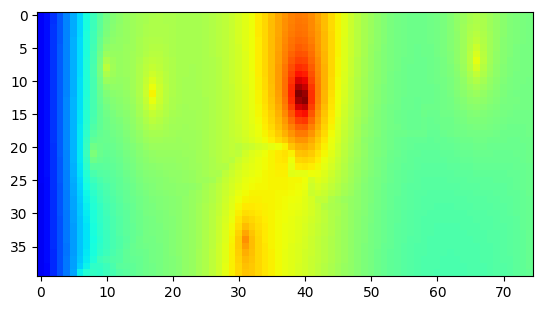

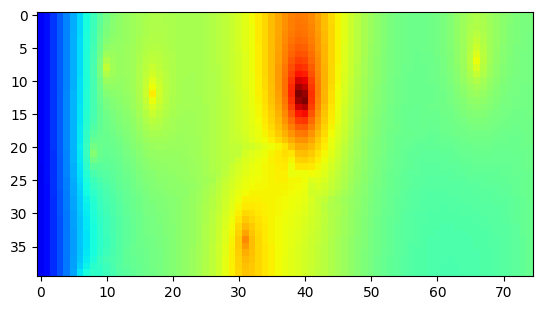

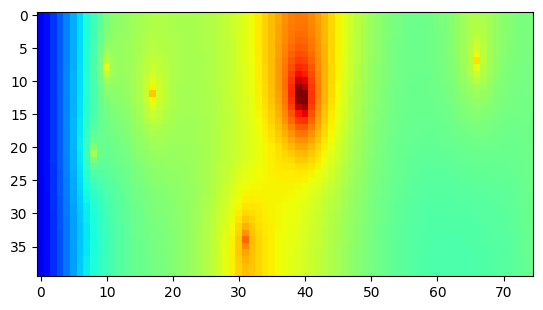

In [17]:
import matplotlib.pyplot as plt

for layer_idx in range(result.flow_head_results.number_of_layers):
  heads = engine.read_flow_head(idx=0, layer=layer_idx)
  plt.imshow(heads, cmap='jet_r', vmin=450, vmax=460)
  plt.show()